## The incidence of chickenpox in France (2016-2024)

The data on the incidence of chickenpox-like illness are available from the Web site of the [Réseau Sentinelles](http://www.sentiweb.fr/). We download them as a file in CSV format, in which each line corresponds to a week in the observation period. The dataset used is starting in 2016 and ends with 2024.

In [25]:
!pip install isoweek

In [26]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
from isoweek import Week
from datetime import datetime, timedelta

In [27]:
data_url = "https://www.sentiweb.fr/datasets/all/inc-7-RDD-ds2.csv"
filename = "inc-7-PAY-ds2.csv"

1. Download -> if there is not a local file already

In [28]:
if not os.path.exists(filename):
    raw_data = pd.read_csv(data_url, skiprows=1)
else:
    raw_data = pd.read_csv(filename)

2. Remove rows with missing values

In [30]:
raw_data[raw_data.isnull().any(axis=1)]
raw_data = raw_data.dropna()
raw_data

week  geo_insee  indicator   inc  inc100  inc_up  inc_low  inc100_up  \
0     201601         44          7   574      10     861      287         15   
1     201601         75          7  1513      25    2099      927         35   
2     201601         84          7  2363      30    2958     1768         37   
3     201601         27          7   686      24    1058      314         36   
4     201601         53          7   532      16     874      190         26   
5     201601         24          7   394      15     625      163         24   
6     201601         94          7    38      12      82        0         25   
7     201601         11          7  3030      25    3788     2272         31   
8     201601         76          7   842      14    1307      377         22   
9     201601         32          7  2100      34    2711     1489         44   
10    201601         28          7   418      12     687      149         20   
11    201601         52          7  1029      27    1577      481         42   
12    201601         93          7  1053      21    1457      649         29   
13    201602         44          7   772      14    1122      422         20   
14    201602         75          7   657      11    1016      298         17   
15    201602         84          7  1486      19    1928     1044         24   
16    201602         27          7   442      15     727      157         25   
17    201602         53          7   444      13     744      144         22   
18    201602         24          7   402      15     627      177         24   
19    201602         94          7    12       4      42        0         13   
20    201602         11          7  1745      14    2317     1173         19   
21    201602         76          7  1101      19    1644      558         28   
22    201602         32          7  1249      20    1720      778         28   
23    201602         28          7  1064      31    1519      609         44   
24    201602         52          7   408      11     708      108         19   
25    201602         93          7  1570      31    2099     1041         42   
26    201603         44          7   985      17    1442      528         25   
27    201603         75          7  2070      34    2769     1371         46   
28    201603         84          7  2258      28    2810     1706         35   
29    201603         27          7  1009      35    1538      480         53   
...      ...        ...        ...   ...     ...     ...      ...        ...   
6379  202522         32          7    30       0     195        0          3   
6380  202522         28          7     0       0       0        0          0   
6381  202522         52          7   198       5     528        0         13   
6382  202522         93          7  1254      24    3098        0         59   
6383  202523         44          7   413       7    1090        0         19   
6384  202523         75          7   442       7    1117        0         18   
6385  202523         84          7  1148      14    2156      140         26   
6386  202523         27          7     0       0       0        0          0   
6387  202523         53          7   143       4     394        0         11   
6388  202523         24          7   272      10     667        0         25   
6389  202523         94          7    37      10     104        0         29   
6390  202523         11          7   905       7    1763       47         14   
6391  202523         76          7    75       1     435        0          7   
6392  202523         32          7   527       9    1226        0         20   
6393  202523         28          7   108       3     321        0          9   
6394  202523         52          7     0       0       0        0          0   
6395  202523         93          7   336       6    1130        0         22   
6396  202524         44          7   196       3     741        0         13   
6397  20

3. Convert 'week' to period 

In [40]:
def convert_week(yw):
    y = int(str(yw)[:4])
    w = int(str(yw)[4:])
    return pd.Period(Week(y, w).monday(), 'W')

raw_data['period'] = raw_data['week'].apply(convert_week)

4. Set 'period' as index and sort the dataset

In [43]:
sorted_data = raw_data.set_index('period').sort_index()


5. Choose September 1st as the beginning of each annual period

In [44]:
start_weeks = [pd.Period(pd.Timestamp(y, 9, 1), 'W') for y in range(2016, 2025)]

6. Collect the incidence per year information

In [45]:
years = []
totals = []
for w1, w2 in zip(start_weeks[:-1], start_weeks[1:]):
    season_data = sorted_data['inc'][w1:w2 - 1]
    if abs(len(season_data) - 52) < 3:
        totals.append(season_data.sum())
        years.append(w2.year)

yearly_incidence = pd.Series(data=totals, index=years)

TypeError: Cannot compare type 'Period' with type 'int'

In [46]:
yearly_incidence.plot(style='o-', title='Annual Chickenpox Incidence')
plt.ylabel("Total incidence")
plt.xlabel("Year")
plt.grid(True)
plt.show()


TypeError: Empty 'DataFrame': no numeric data to plot

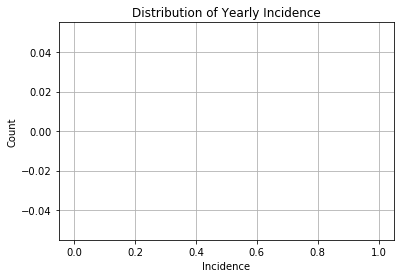

In [47]:
yearly_incidence.hist()
plt.title("Distribution of Yearly Incidence")
plt.xlabel("Incidence")
plt.ylabel("Count")
plt.show()

In [48]:
strongest = yearly_incidence.idxmax()
weakest = yearly_incidence.idxmin()
print(f"Strongest epidemic year: {strongest}")
print(f"Weakest epidemic year: {weakest}")

ValueError: attempt to get argmax of an empty sequence